In [584]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [585]:
df=pd.read_csv('Algerian_forest_fires_dataset.csv')

In [586]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [587]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [588]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [589]:
df.drop(122,inplace=True)

In [590]:
df.loc[:122,'Region']=0
df.loc[122:,'Region']=1

In [591]:
df['Region']=df['Region'].astype(int)

In [592]:
df[df.isnull().any(axis=1)]


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1


In [593]:
df=df.dropna().reset_index(drop=True)

In [594]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [595]:
df.drop(122,inplace=True)

In [596]:
df.columns=df.columns.str.strip()

In [597]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

#### Change the Required columns into integer type

In [598]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [599]:
df[['day','month','year','Temperature','RH','Ws']]=df[['day','month','year','Temperature','RH','Ws']].astype(int)

In [600]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 30.4+ KB


In [601]:
df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']]=df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']].astype(float)

In [602]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 30.4+ KB


In [603]:
df.to_csv('Algerian_forest_fires_cleaned_dataset.csv',index=False)

### Exploratory Data Anlysis

In [604]:
df1=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [605]:
df1.drop(['day','month','year'],axis=1,inplace=True)

In [606]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [607]:
df1['Classes']=df1['Classes'].str.strip()

In [608]:
df1['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [609]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [610]:
df1.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [611]:
df1['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

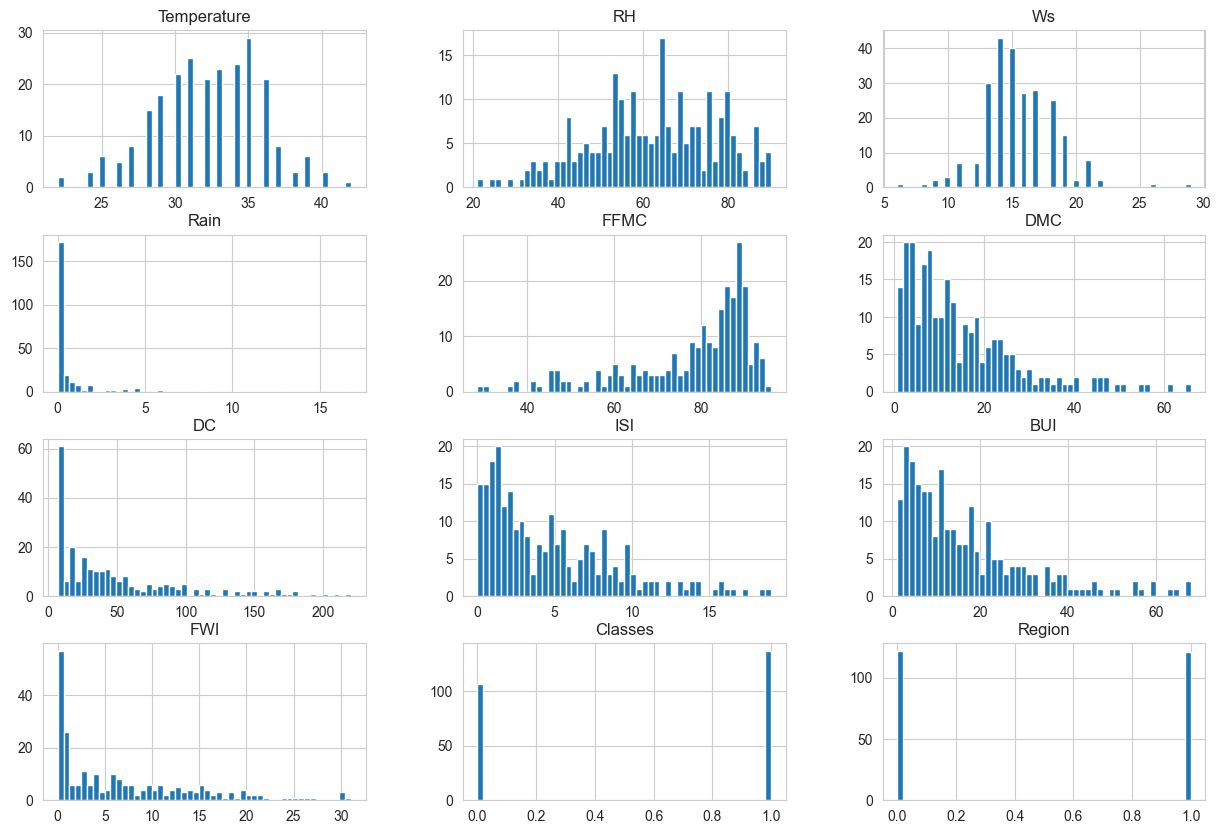

In [612]:

df1.hist(bins=50,figsize=(15,10))
plt.show()

In [613]:
## Pie chart
percentage=df1['Classes'].value_counts(normalize=True)*100

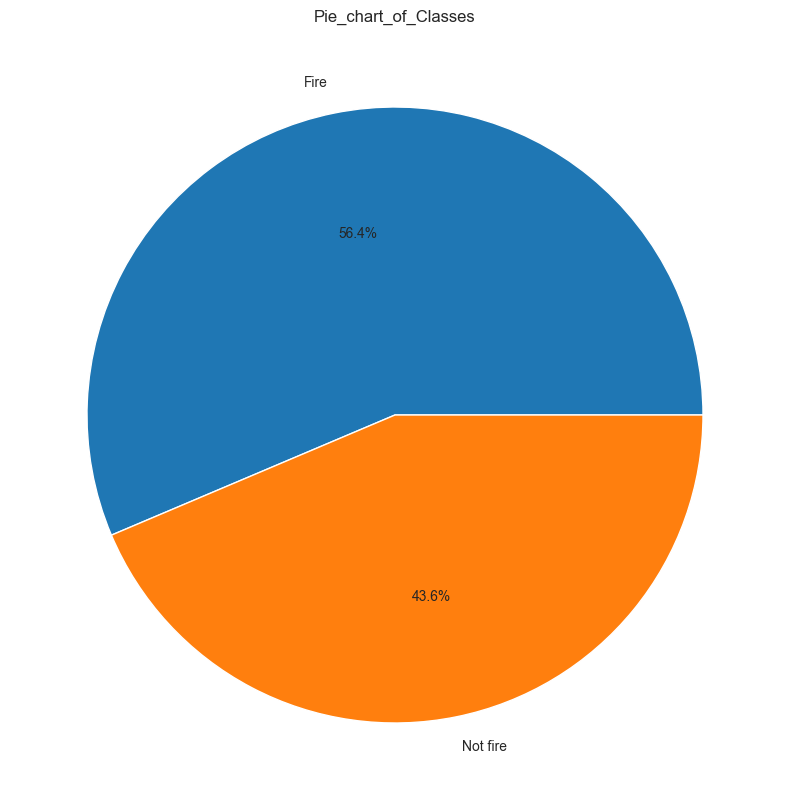

In [614]:
class_labels=['Fire','Not fire']
plt.figure(figsize=(12,10))
plt.pie(percentage,labels=class_labels,autopct="%1.1f%%")
plt.title('Pie_chart_of_Classes')
plt.show()

In [615]:
corr=df1.corr()

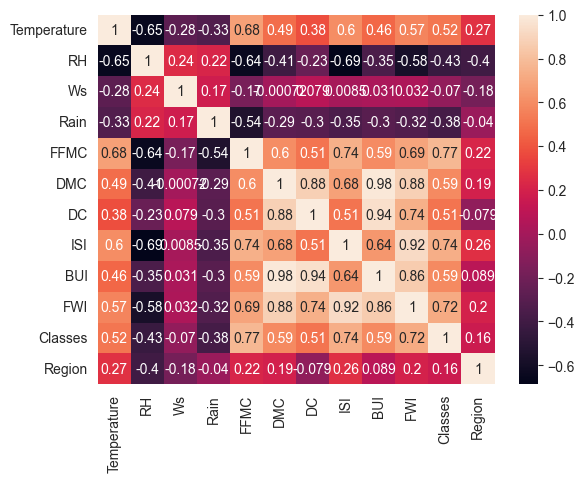

<Figure size 2000x1500 with 0 Axes>

In [616]:
sns.heatmap(corr,annot=True)
plt.figure(figsize=(20,15))
plt.show()

In [617]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [618]:
df['Classes']=df['Classes'].str.strip()

Text(0.5, 1.0, 'Fire_Anlysis of Sidi-Bel_Region')

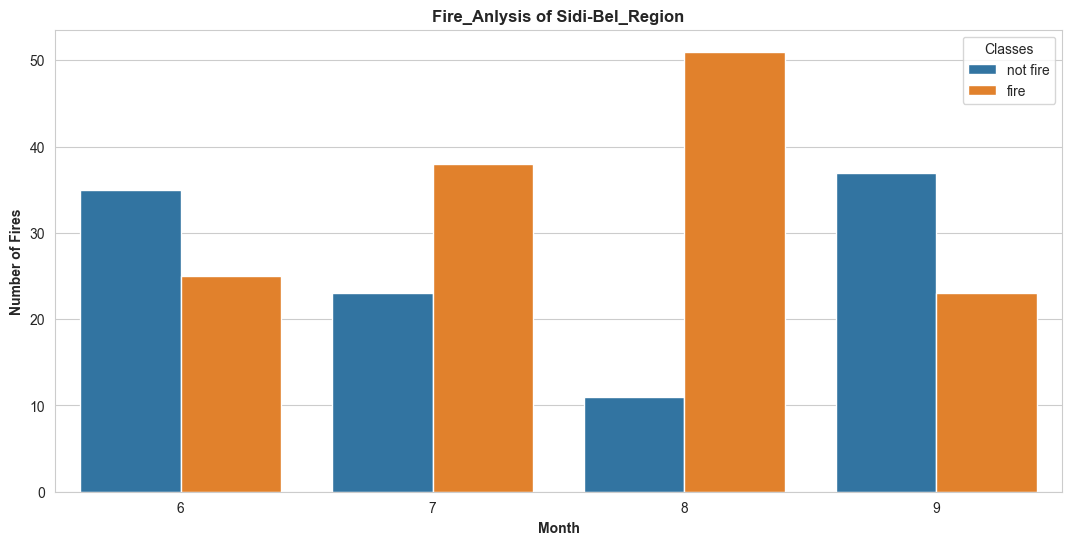

In [619]:
### Monthly fire analysis
dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.xlabel('Month',weight='bold')
plt.ylabel('Number of Fires',weight='bold')
plt.title('Fire_Anlysis of Sidi-Bel_Region',weight='bold')


### Applying Ridge,Lasso,Elastonet

In [620]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [621]:
df1['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [622]:
### Independent and Dependent Feature
X=df1.drop('FWI',axis=1)
y=df1['FWI']

In [623]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [624]:
## Feature Selection
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

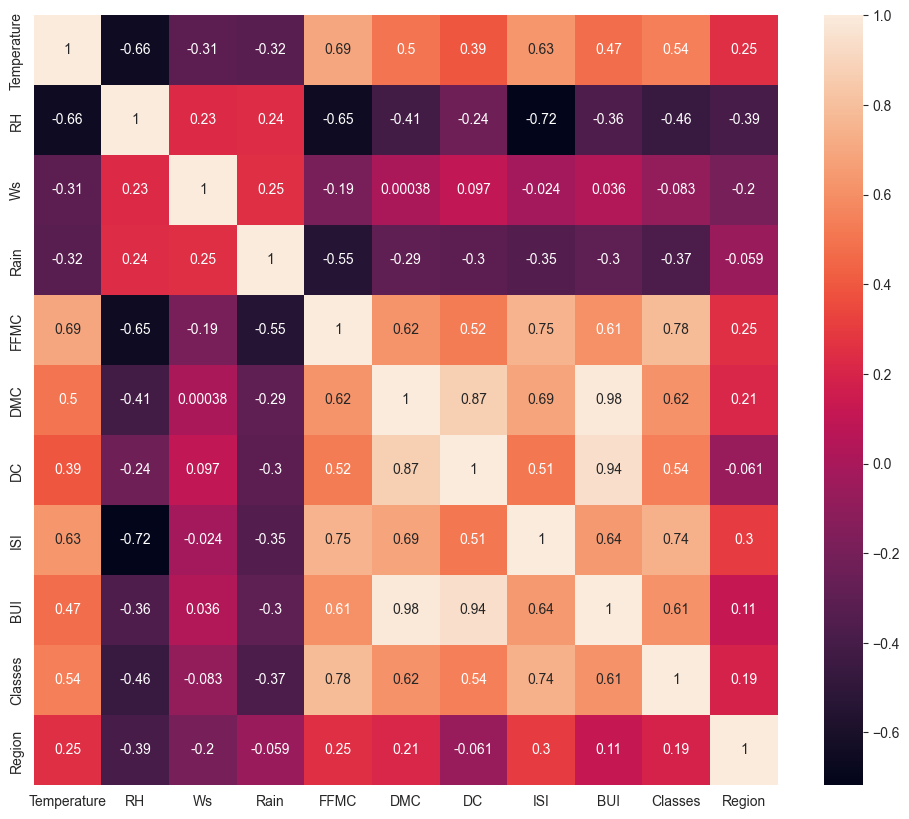

In [625]:
### Check for Multicollinearity-when two independent Feature are highly Correlated
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [626]:
def correlation(dataset,threshold):
    col_corr=set()
    col_matrix=dataset.corr()
    for i in range(len(col_matrix.columns)):
        for j in range(i):
            if abs(col_matrix.iloc[i,j])>threshold:
                colname=col_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
            


In [627]:
## Threshold Domain Expertise
corr_features=correlation(X_train,0.85)

In [628]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [629]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [630]:
X_train_scaled=scaler.fit_transform(X_train)

In [631]:
X_test_scaled=scaler.transform(X_test)

#### Box Plots to Understand Effect of Standard Scaler

ChatGPT said:
plt.subplot() in Matplotlib is used to create multiple plots in the same figure by dividing the figure into a grid of subplots.

It’s like splitting your canvas into smaller sections so you can draw several charts side-by-side or in rows.


plt.subplot(nrows, ncols, index)


plt.subplot() → Add one subplot at a time

plt.subplots() → Create all subplots at once and returns axes objects (better for large projects)

Text(0.5, 1.0, 'X_train after Scaling')

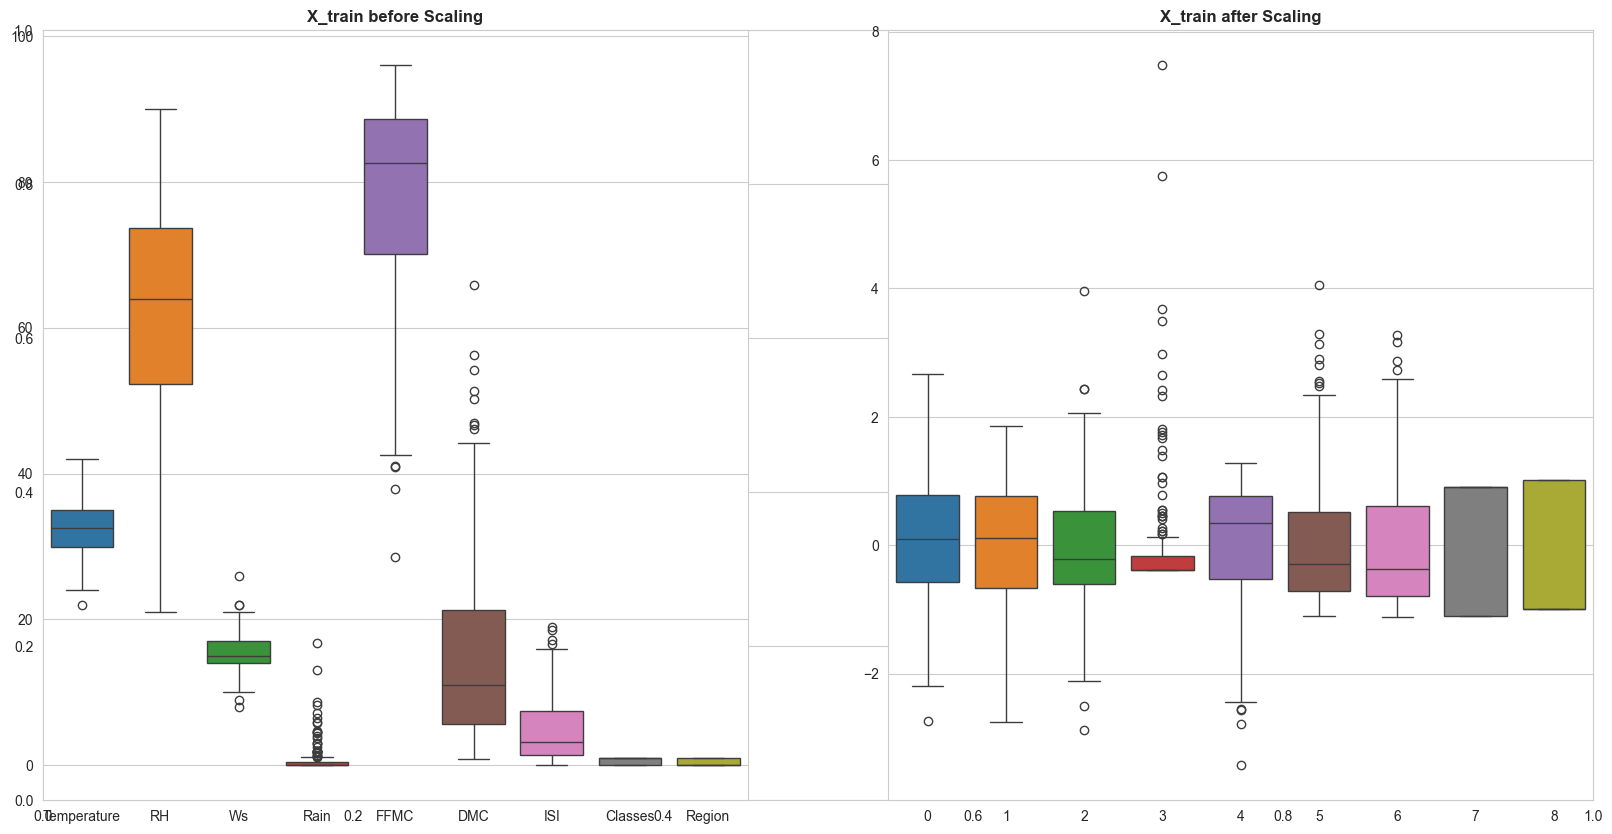

In [635]:
plt.subplots(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train before Scaling',weight='bold')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train after Scaling',weight='bold')

## After scaling Range is almost same

In [638]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression(n_jobs=-1)

In [639]:
regression.fit(X_train_scaled,Y_train)

LinearRegression(n_jobs=-1)

In [640]:
Y_pred=regression.predict(X_test_scaled)

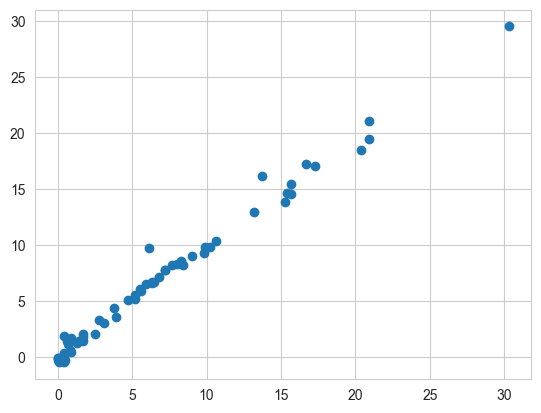

In [641]:
plt.scatter(Y_test,Y_pred)

In [642]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
mse=mean_squared_error(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)
rmse=root_mean_squared_error(Y_test,Y_pred)
score=r2_score(Y_test,Y_pred)
print("mean_squared_error:",mse)
print("mean_absolute_error",mae)
print("root_mean_squared_error:",rmse)
print("score:",score)

mean_squared_error: 0.674276687379158
mean_absolute_error 0.5468236465249978
root_mean_squared_error: 0.8211435242265253
score: 0.9847657384266951


#### Lasso Regression

In [644]:
from sklearn.linear_model import Lasso

lasso=Lasso()
lasso.fit(X_train_scaled,Y_train)
Y_pred_lasso=lasso.predict(X_test_scaled)


In [645]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
mse=mean_squared_error(Y_test,Y_pred_lasso)
mae=mean_absolute_error(Y_test,Y_pred_lasso)
rmse=root_mean_squared_error(Y_test,Y_pred_lasso)
score=r2_score(Y_test,Y_pred_lasso)
print("mean_squared_error:",mse)
print("mean_absolute_error",mae)
print("root_mean_squared_error:",rmse)
print("score:",score)

mean_squared_error: 2.2483458918974772
mean_absolute_error 1.133175994914409
root_mean_squared_error: 1.4994485292591664
score: 0.9492020263112388


## Cross Validation Lasso

In [647]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)

In [648]:
lassocv.fit(X_train_scaled,Y_train)
Y_pred_lcv=lassocv.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
mse=mean_squared_error(Y_test,Y_pred_lcv)
mae=mean_absolute_error(Y_test,Y_pred_lcv)
rmse=root_mean_squared_error(Y_test,Y_pred_lcv)
score=r2_score(Y_test,Y_pred_lcv)
print("mean_squared_error:",mse)
print("mean_absolute_error",mae)
print("root_mean_squared_error:",rmse)
print("score:",score)
## It gives best accuracy as compare to lasso

mean_squared_error: 0.792499555474362
mean_absolute_error 0.619970115826343
root_mean_squared_error: 0.8902244410677355
score: 0.9820946715928275


In [650]:
from sklearn.linear_model import Ridge
ridge=Ridge()

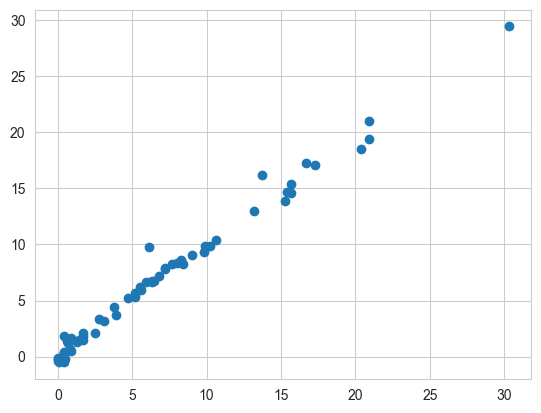

In [651]:
ridge.fit(X_train_scaled,Y_train)
Y_pred_ridge=ridge.predict(X_test_scaled)
plt.scatter(Y_test,Y_pred_ridge)

In [653]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV()

In [655]:
ridgecv.fit(X_train_scaled,Y_train)
Y_pred_ridgecv=ridgecv.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
mse=mean_squared_error(Y_test,Y_pred_ridgecv)
mae=mean_absolute_error(Y_test,Y_pred_ridgecv)
rmse=root_mean_squared_error(Y_test,Y_pred_ridgecv)
score=r2_score(Y_test,Y_pred_ridgecv)
print("mean_squared_error:",mse)
print("mean_absolute_error",mae)
print("root_mean_squared_error:",rmse)
print("score:",score)

mean_squared_error: 0.6949198918151945
mean_absolute_error 0.5642305340106358
root_mean_squared_error: 0.833618552945647
score: 0.9842993364555516


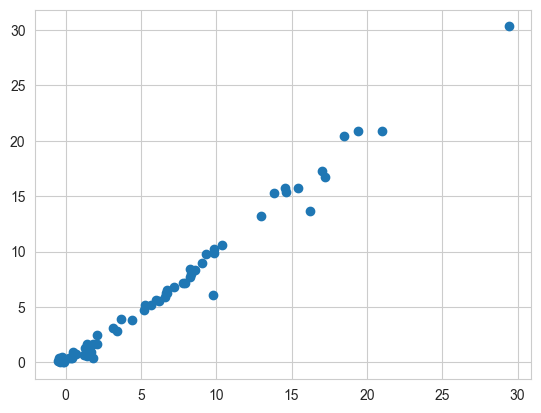

In [656]:
plt.scatter(Y_pred_ridgecv,Y_test)

In [ ]:
### Pickle The machine learning models ,preparing model standarddcaler

In [657]:
scaler

StandardScaler()

In [658]:
ridgecv

RidgeCV()

In [659]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridgecv,open('ridgecv.pkl','wb'))

